In [3]:
# #Important package for NLP
# ! pip install nltk
# ! pip install -U spacy
# ! pip install textblob
# ! pip install scikit-learn

# # for data manupulation, cleansing and plotting
# ! pip install pandas
# ! pip install matplotlib
# ! pip install numpy
# ! pip install plotly


# ! pip list  #check installed packages
# ! pip freeze > requirements.txt #save installed packages to requirements.txt

In [4]:
import re

import pandas as pd
import numpy as np

import nltk #natural language toolkit

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt


# !python -m spacy download en


import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_sm')

In [5]:
# Reading the training and testing dataset
df_data = pd.read_csv('./data/train.csv')
# df_test_orginal = pd.read_csv('./data/test.csv')

# df_train= df_train_orginal.sample(n=1000) #sampling  the data to make it faster
# df_test= df_test_orginal.sample(n=1000)#sampling only 1000 rows randomly

# df_data= df_train_orginal.sample(n=10000) #sampling 10000 from 3 lakh data  the data to make it faster
df_data.head()

,id,abstract,category,category_num
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7
3,427612,We say that a random integer variable $X$ is...,math-PR,93
4,113852,We derive a formula expressing the joint dis...,math-CO,76


In [6]:
# # Distribution of data among the category
# import pandas as pd
# pd.options.plotting.backend = "plotly"

# fig=df_train_orginal['category'].value_counts().plot(kind='bar')
# fig.show()

In [7]:
# df_train['category'].value_counts()

In [8]:
# ps = PorterStemmer()
# lem= WordNetLemmatizer()

In [9]:
# def clean_abstract(text):
#   text = re.sub('[^a-z\s]', ' ', text.lower())
#   text = [i.lower() for i in text.split() if i not in nlp.Defaults.stop_words]
#   text = [ps.stem(i) for i in text]
#   text = ' '.join(text)
#   text.replace('\n',' ')
#   return text

In [10]:
# df_train['abstract'] = df_train['abstract'].apply(clean_abstract)
# df_test['abstract'] = df_test['abstract'].apply(clean_abstract)

# df_train.head()

In [11]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer

# #tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(df_data['abstract'])
# text_counts.shape


In [12]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# text_counts_tfidf = tfidf_transformer.fit_transform(text_counts)
# text_counts_tfidf.shape

In [13]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     text_counts_tfidf, df_data['category_num'], test_size=0.3, random_state=1)


In [14]:
# from sklearn.naive_bayes import MultinomialNB
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Generation Using Multinomial Naive Bayes
# clf = MultinomialNB().fit(X_train, y_train)
# predicted= clf.predict(X_test)
# print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [15]:
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# df_data['category'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='no. belonging to category ', title='Category Distribution')

In [16]:

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

df_data = df_data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_data['abstract'] = df_data['abstract'].apply(clean_text)
df_data['abstract'] = df_data['abstract'].str.replace('\d+', '') #remove digits


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\074be\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# The maximum number of words to be used for prediction. (most frequent)
MAX_NB_WORDS =50000
# Max number of words in each abstract may add empty spaces if needed
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True) 
tokenizer.fit_on_texts(df_data['abstract'].values) # assign each word a number by how commonly they appear in the dataset.
word_index = tokenizer.word_index # word_index is a dictionary mapping of the words to the numbers.

print(type(word_index))
print('Found %s unique tokens.' % len(word_index))



<class 'dict'>
Found 1848896 unique tokens.


In [21]:
df_wordindex = pd.DataFrame.from_dict(word_index, orient='index')

#save to csv
df_wordindex.to_csv('word_index.csv')

df_wordindex.head(100)


,0
model,1
data,2
show,3
results,4
using,5
...,...
linear,96
consider,97
several,98
b,99


In [129]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df_data['abstract'].values) # convert each word to a number
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) # pad the sequences to the same length 
print('Shape of data tensor:', X.shape)

Shape of data tensor: (390603, 300)


In [130]:

Y = pd.get_dummies(df_data['category']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (390603, 156)


In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(351542, 300) (351542, 156)
(39061, 300) (39061, 156)


In [137]:


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(Y[1]), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
epochs = 20
batch_size =512

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 300, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_24 (Spatia (None, 300, 100)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_24 (Dense)             (None, 156)               15756     
Total params: 5,096,156
Trainable params: 5,096,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
618/618 [==============================] - 2125s 3s/step - loss: 3.3670 - accuracy: 0.2024 - val_loss: 2.4043 - val_accuracy: 0.3641
Epoch 2/20
618/618 [==============================] - 2026s 3s/step - loss: 2.0403 - accuracy: 0.

In [142]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1221/1221 [==============================] - 262s 214ms/step - loss: 1.4816 - accuracy: 0.609912s - loss: 1. - E
Test set
  Loss: 1.482
  Accuracy: 0.610


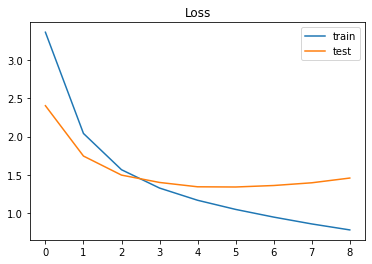

In [232]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

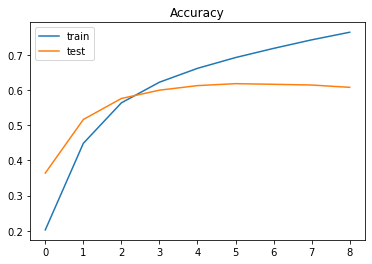

In [144]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [145]:
column_names = ['id','category_num']

df_solution = pd.DataFrame(columns = column_names)
df_solution

,id,category_num


In [146]:
df_test=pd.read_csv('./data/test.csv')
# df_test

## copy 'id' column of test.csv to "Id" column of df_solution
df_solution.id=df_test.id   # or use below method
# df_solution["id"]=df_test["id"].values
df_test.loc[42630]

# df_solution

id                                                     110188
abstract      We establish a theoretical link between adve...
Name: 42630, dtype: object

In [159]:
for index, row in df_test.iterrows():
    new_abstract = [row['abstract']]
    seq = tokenizer.texts_to_sequences(new_abstract)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    print ('Currently processing Index no.:  ', index)
    df_solution.loc[index,'category_num'] = pred.argmax()
    

    





# def predict_category(text):
#     new_abstract = [text]
#     seq = tokenizer.texts_to_sequences(new_abstract)
#     padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
#     pred = new_model.predict(padded)
#     # print(pred.argmax())
#     return pred.argmax()


# df_solution['category_num'] = df_test['abstract'].apply(predict_category)

  
    

    

Currently processing Index no.:   0
Currently processing Index no.:   1
Currently processing Index no.:   2
Currently processing Index no.:   3
Currently processing Index no.:   4
Currently processing Index no.:   5
Currently processing Index no.:   6
Currently processing Index no.:   7
Currently processing Index no.:   8
Currently processing Index no.:   9
Currently processing Index no.:   10
Currently processing Index no.:   11
Currently processing Index no.:   12
Currently processing Index no.:   13
Currently processing Index no.:   14
Currently processing Index no.:   15
Currently processing Index no.:   16
Currently processing Index no.:   17
Currently processing Index no.:   18
Currently processing Index no.:   19
Currently processing Index no.:   20
Currently processing Index no.:   21
Currently processing Index no.:   22
Currently processing Index no.:   23
Currently processing Index no.:   24
Currently processing Index no.:   25
Currently processing Index no.:   26
Currently p

KeyboardInterrupt: 

In [ ]:
df_solution.to_csv('solution.csv',index=False)

In [156]:
####  Test manually
new_abstract = [" The point process is a solid framework to model sequential data, such as videos, by exploring the underlying relevance. As a challenging problem for high-level video understanding, weakly supervised action recognition and localization in untrimmed videos has attracted intensive research attention. Knowledge transfer by leveraging the publicly available trimmed videos as external guidance is a promising attempt to make up for the coarse-grained video-level annotation and improve the generalization performance. However, unconstrained knowledge transfer may bring about irrelevant noise and jeopardize the learning model. This paper proposes a novel adaptability decomposing encoder-decoder network to transfer reliable knowledge between trimmed and untrimmed videos for action recognition and localization via bidirectional point process modeling, given only video-level annotations. By decomposing the original features into domain-adaptable and domain-specific ones based on their adaptability, trimmed-untrimmed knowledge transfer can be safely confined within a more coherent subspace. An encoder-decoder based structure is carefully designed and jointly optimized to facilitate effective action classification and temporal localization. Extensive experiments are conducted on two benchmark datasets (i.e., THUMOS14 and ActivityNet1.3), and experimental results clearly corroborate the efficacy of our method.  "]



seq = tokenizer.texts_to_sequences(new_abstract)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
print(np.argmax(pred))

25
